# Importing necessary libraries 

In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("white")


df = pd.read_csv('Cleaned_data.csv')

In [432]:
df.head()

,hotel,is_canceled,No Response,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,0.0,342,2015,July,27,1,0,0,...,3,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0.0,0.0,737,2015,July,27,1,0,0,...,4,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0.0,0.0,7,2015,July,27,1,0,1,...,0,No Deposit,-1.0,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0.0,0.0,13,2015,July,27,1,0,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0.0,0.0,14,2015,July,27,1,0,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,03-07-2015


# Total hotels booked

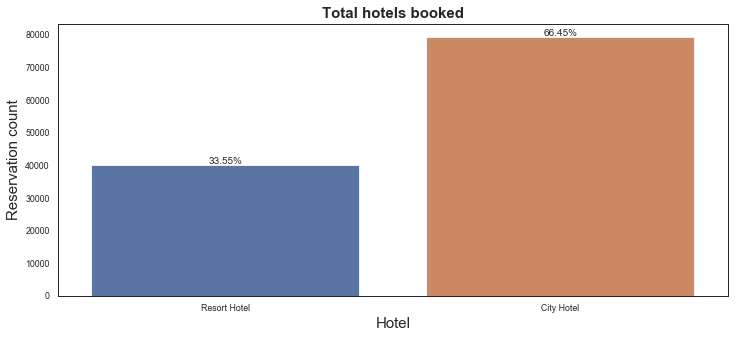

In [433]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(df['hotel'])
plt.xlabel('Hotel', size = 15)
plt.ylabel('Reservation count', size = 15)
plt.title('Total hotels booked', weight='bold', size = 15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

# Cancelled and non-cancelled bookings
## More than 37 % of the hotels were cancelled that too mostly "City Hotels" (27%).

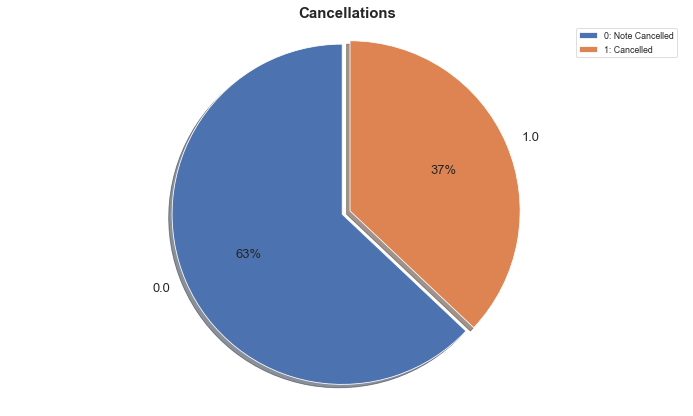

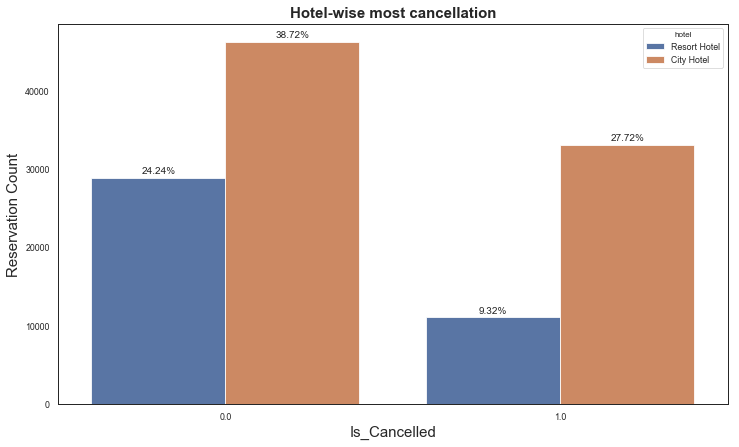

In [509]:
fig, ax = plt.subplots(figsize = (12,7))

x = df.groupby('is_canceled')['is_canceled'].count()
y = x.index.get_level_values(0)
explode = (0, 0.05)
plt.title('Cancellations', weight='bold', size = 15)
labels = [r'0: Note Cancelled', r'1: Cancelled']

plt.pie(x, labels=y, explode = explode, autopct='%1.0f%%',shadow=True, startangle=90, textprops={'fontsize': 13})
plt.axis('equal')
plt.legend(labels, loc="best")
     
#---------------------------------------------------------------------------------------------------------------------------    
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(df['is_canceled'], hue = df['hotel'] )

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")  
plt.title('Hotel-wise most cancellation', weight='bold', size = 15)
plt.xlabel('Is_Cancelled', size = 15)
plt.ylabel('Reservation Count', size = 15)


# Impact of Lead time on cancellation

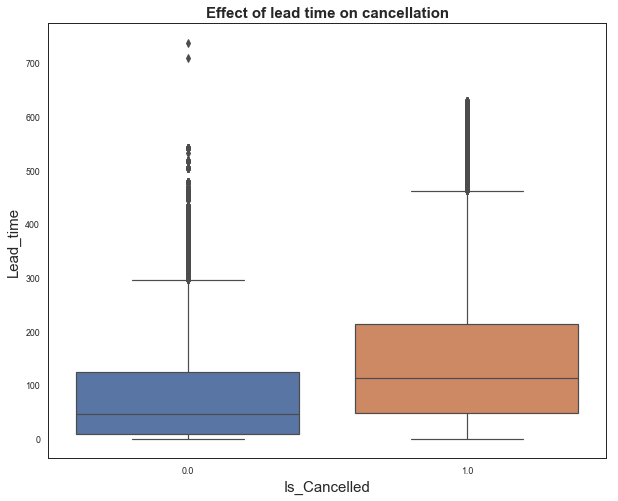

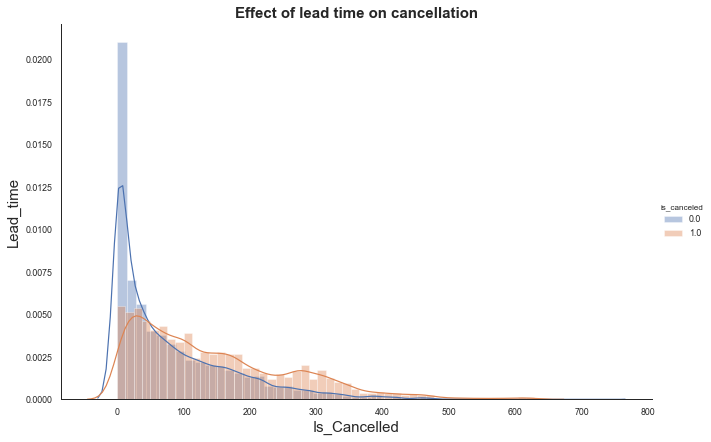

In [436]:
fig, ax = plt.subplots(figsize = (10,8))

sns.boxplot(y = df["lead_time"], x = df['is_canceled'])
plt.title('Effect of lead time on cancellation', weight='bold',size= 15)
plt.xlabel('Is_Cancelled',size = 15)
plt.ylabel('Lead_time',size = 15)



sns.FacetGrid(df, hue="is_canceled", height = 6,aspect=1.5) \
   .map(sns.distplot, "lead_time") \
   .add_legend();
plt.title('Effect of lead time on cancellation', weight='bold',size = 15)
plt.xlabel('Is_Cancelled',size = 15)
plt.ylabel('Lead_time',size = 15)

# Year wise and month wise most bookigs

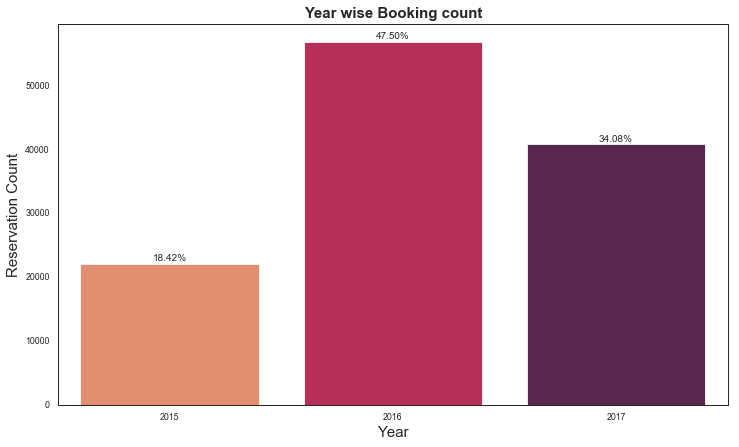

In [438]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x=df['arrival_date_year'], palette = 'rocket_r')
plt.title('Year wise Booking count', weight='bold',size = 15)
plt.xlabel('Year',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

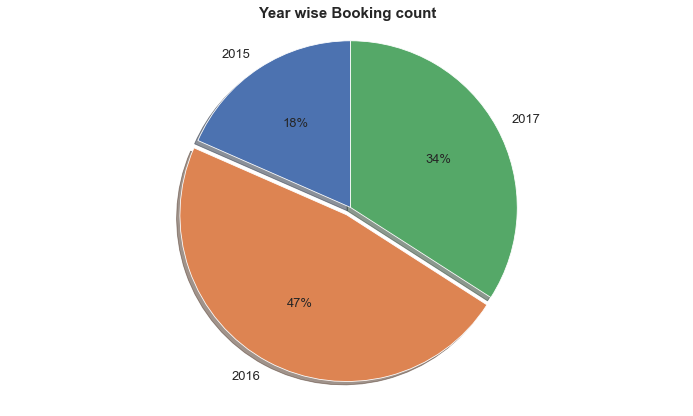

In [439]:
fig, ax = plt.subplots(figsize = (12,7))

x = df.groupby('arrival_date_year')['arrival_date_year'].count()
y = x.index.get_level_values(0)
explode = (0, 0.05, 0)
plt.title('Year wise Booking count', weight='bold',size = 15)

plt.pie(x, labels=y, explode = explode, autopct='%1.0f%%',shadow=True, startangle=90, textprops={'fontsize': 13})
plt.axis('equal')

plt.show()

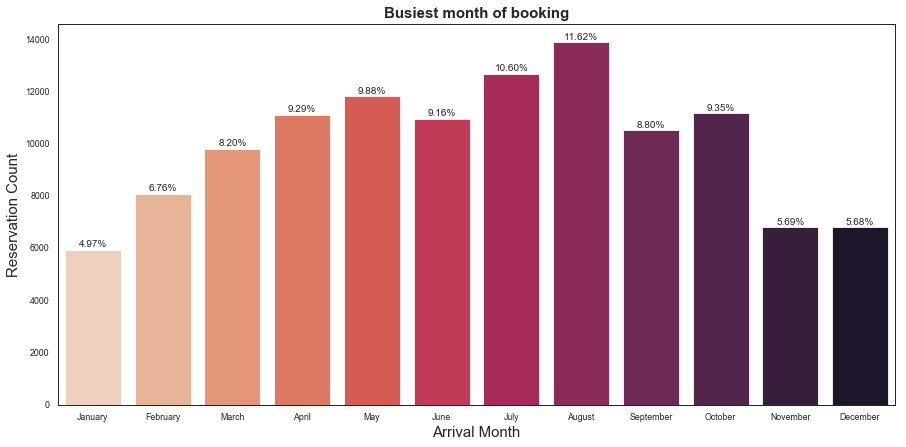

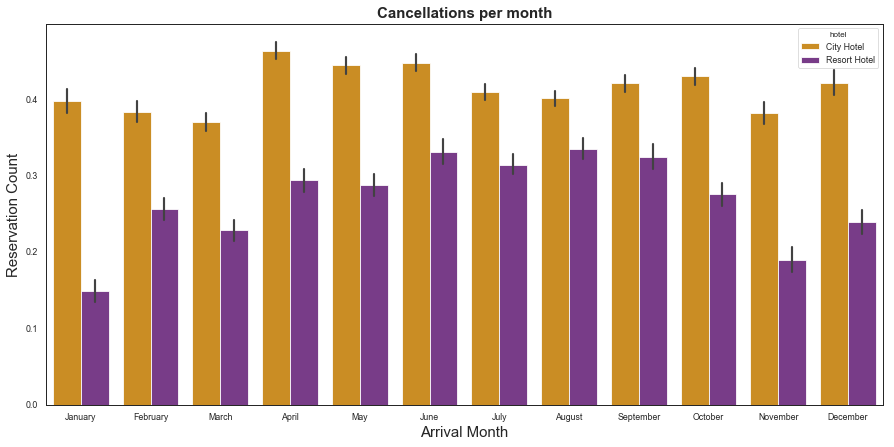

In [447]:
fig, ax = plt.subplots(figsize = (15,7))

x = df.groupby('arrival_date_month')['arrival_date_month'].count().sort_values()
y = x.index.get_level_values(0)
sns.barplot(y, x, palette="rocket_r")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

plt.title('Busiest month of booking', weight='bold',size = 15)
plt.xlabel('Arrival Month', size = 15)
plt.ylabel('Reservation Count', size = 15)



fig, ax = plt.subplots(figsize = (15,7))
sns.barplot(x = "arrival_date_month", y = "is_canceled", hue="hotel",hue_order = ["City Hotel", "Resort Hotel"],data=df,palette= 'CMRmap_r')
plt.title("Cancelations Per Month", weight = 'bold')
plt.title('Cancellations per month', weight='bold',size = 15)
plt.xlabel('Arrival Month', size = 15)
plt.ylabel('Reservation Count', size = 15)



# Effect of number of adults and children on hotel bookings

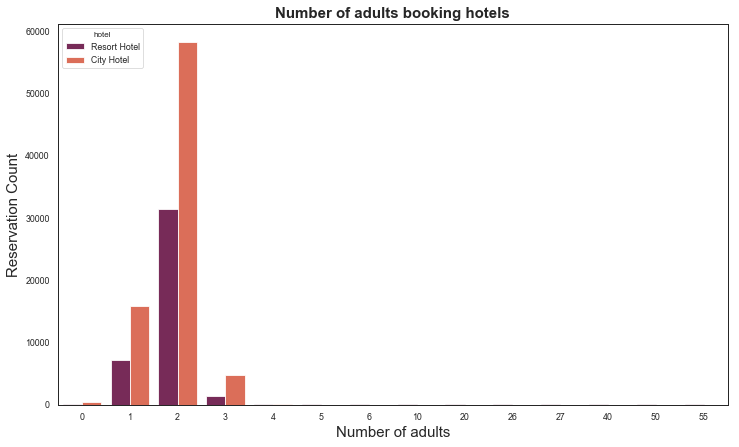

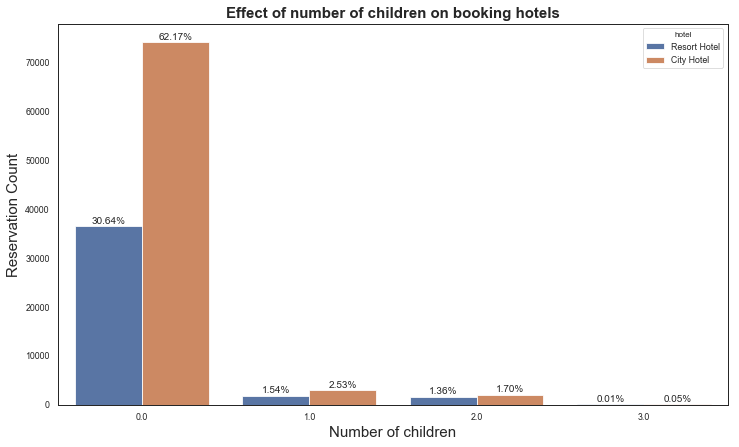

In [527]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x=df['adults'], hue = df['hotel'], palette = 'rocket')
plt.title('Number of adults booking hotels', weight='bold',size = 15)
plt.xlabel('Number of adults',size = 15)
plt.ylabel('Reservation Count',size = 15)

    

    
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x=df['children'], hue = df['hotel'])
plt.title('Effect of number of children on booking hotels', weight='bold',size = 15)
plt.xlabel('Number of children',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

# Country wise most bookings

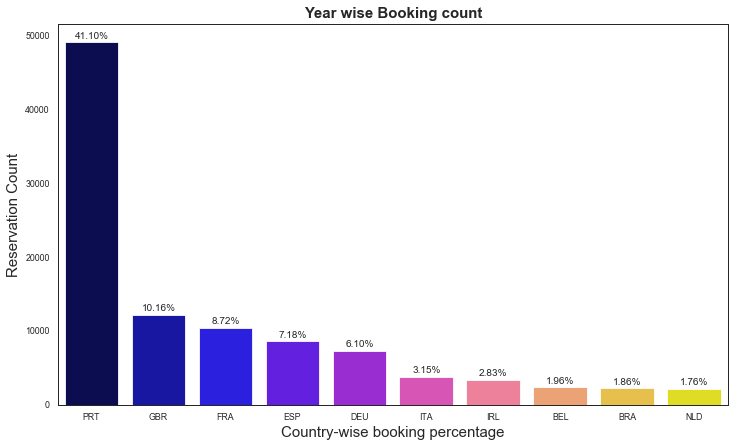

In [530]:
fig, ax = plt.subplots(figsize = (12,7))

x = df.groupby('country')['country'].count().sort_values(ascending=False)[0:10]
y = x.index.get_level_values(0)

sns.barplot(x = y, y=x, palette = 'gnuplot2')
plt.title('Year wise Booking count', weight='bold',size = 15)
plt.xlabel('Country-wise booking percentage',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")


# Effect of Mode of Booking the hotels

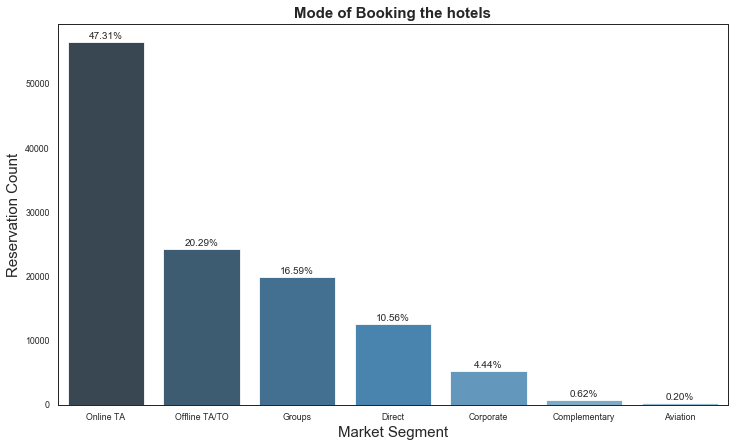

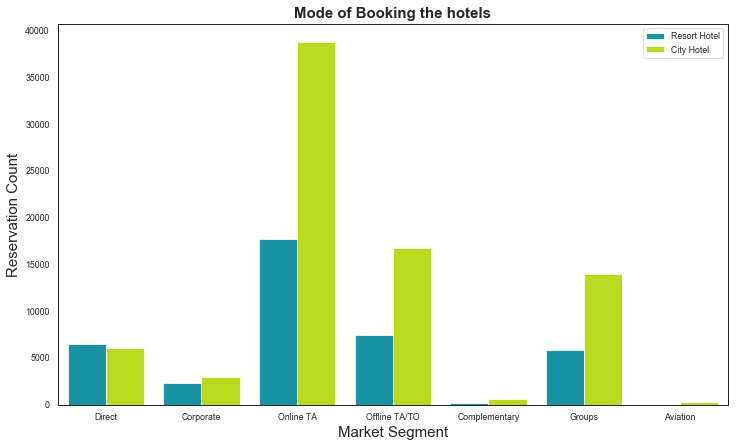

In [514]:
#Blues_d
fig, ax = plt.subplots(figsize = (12,7))


x = df.groupby('market_segment')['market_segment'].count().sort_values(ascending=False)
y = x.index.get_level_values(0)

sns.barplot(x = y, y=x, palette = 'Blues_d')
plt.title('Mode of Booking the hotels', weight='bold',size = 15)
plt.xlabel('Market Segment',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

    
    
fig, ax = plt.subplots(figsize = (12,7))    
sns.countplot(x = "market_segment", data = df, hue = "hotel", palette = 'spectral')
plt.title('Mode of Booking the hotels', weight='bold',size = 15)
plt.xlabel('Market Segment',size = 15)
plt.ylabel('Reservation Count',size = 15)
plt.legend(loc = "upper right")

# Categories of room booked

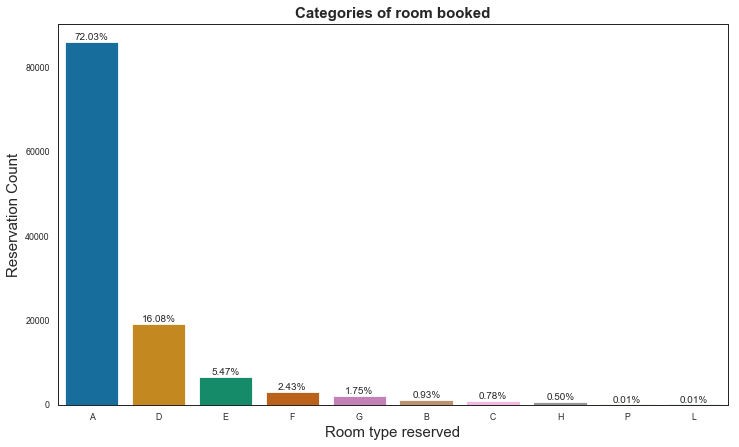

In [498]:
fig, ax = plt.subplots(figsize = (12,7))


x = df.groupby('reserved_room_type')['reserved_room_type'].count().sort_values(ascending=False)
y = x.index.get_level_values(0)

sns.barplot(x = y, y=x, palette = 'colorblind')
plt.title('Categories of room booked', weight='bold',size = 15)
plt.xlabel('Room type reserved',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

    


# Special changes leveraged by two hotels

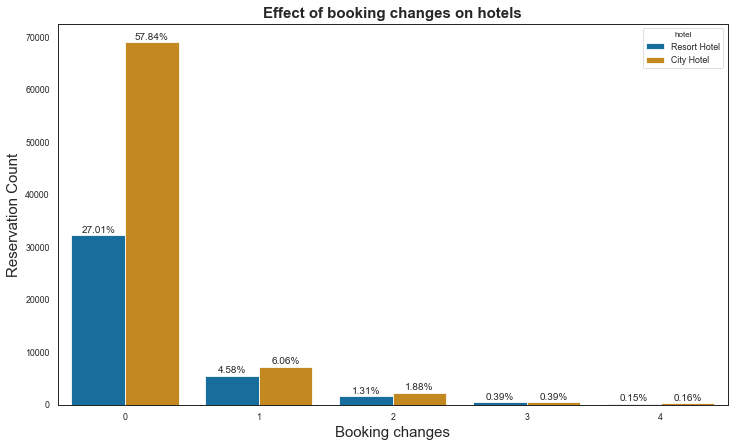

In [453]:
fig, ax = plt.subplots(figsize = (12,7))

sns.countplot(x= 'booking_changes',order=pd.value_counts(df['booking_changes']).iloc[:5].index,hue = 'hotel',data = df,palette= 'colorblind')
plt.title('Effect of booking changes on hotels', weight='bold',size = 15)
plt.xlabel('Booking changes',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

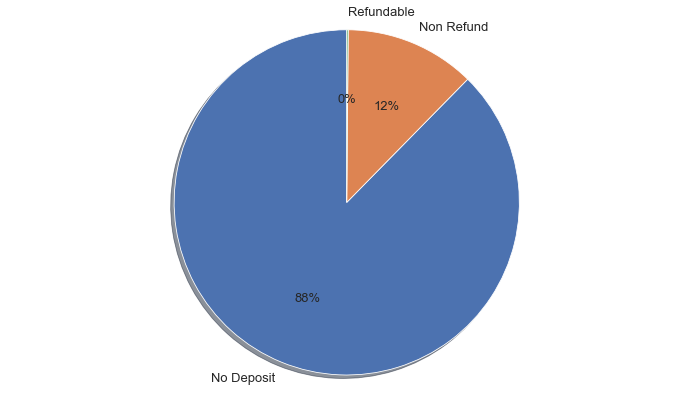

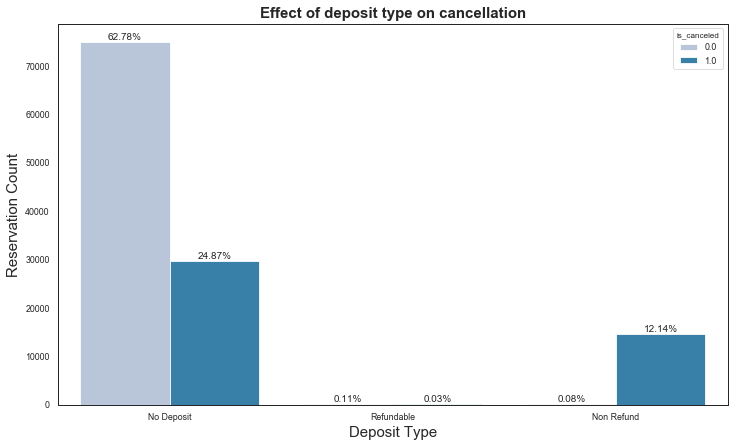

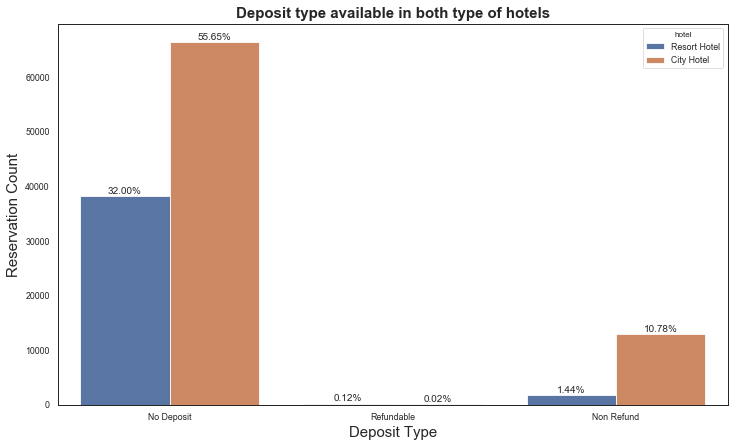

In [507]:
fig, ax = plt.subplots(figsize = (12,7))

x = df.groupby('deposit_type')['deposit_type'].count()
y = x.index.get_level_values(0)
#explode = (0, 0.05, 0)
plt.pie(x, labels=y,autopct='%1.0f%%',shadow=True, startangle=90, textprops={'fontsize': 13})
plt.axis('equal')

plt.show()



fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x=df['deposit_type'], hue = df['is_canceled'], palette = 'PuBu')
plt.title("Effect of deposit type on cancellation", weight='bold',size = 15)
plt.xlabel('Deposit Type',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

    

    
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x=df['deposit_type'], hue = df['hotel'])
plt.title("Deposit type available in both type of hotels", weight='bold',size = 15)
plt.xlabel('Deposit Type',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")
    

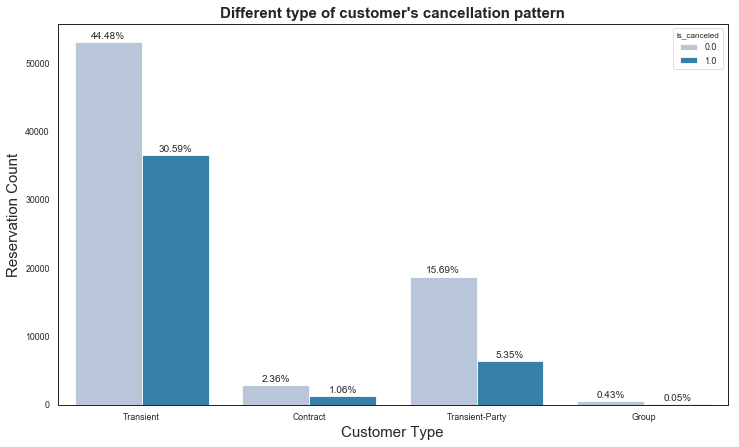

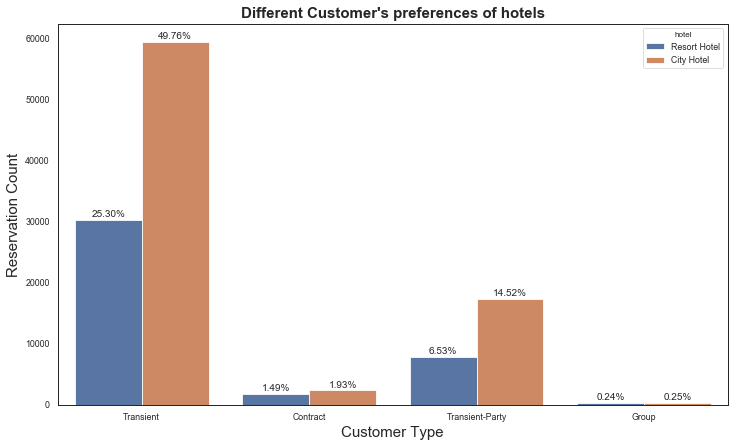

In [466]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x=df['customer_type'], hue = df['is_canceled'], palette = 'PuBu')
plt.title("Different type of customer's cancellation pattern", weight='bold',size = 15)
plt.xlabel('Customer Type',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

    
    
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x=df['customer_type'], hue = df['hotel'])
plt.title("Different Customer's preferences of hotels", weight='bold',size = 15)
plt.xlabel('Customer Type',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

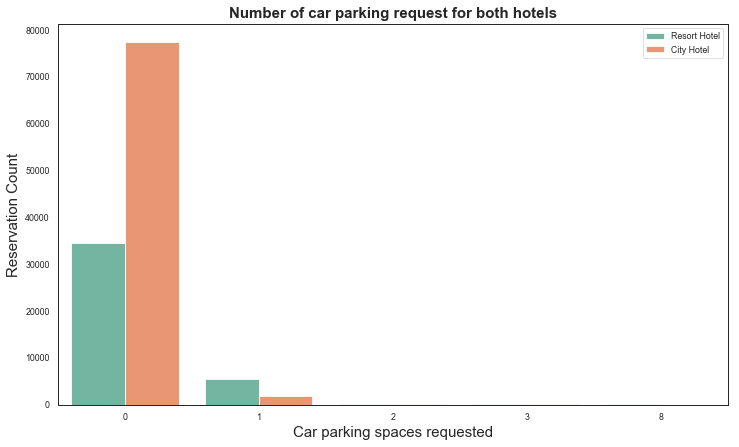

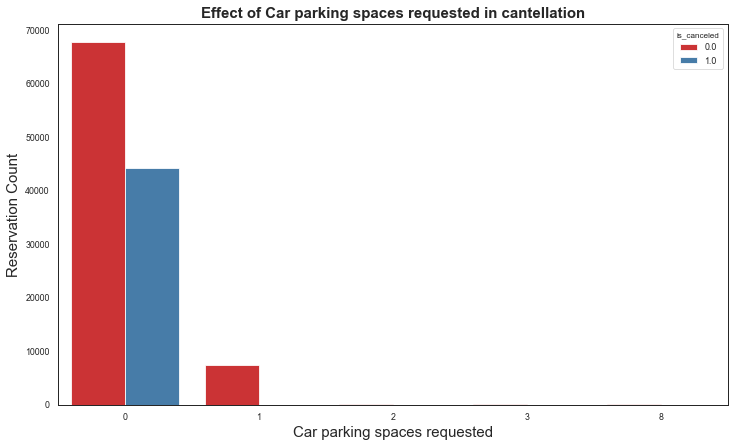

In [469]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x = df['required_car_parking_spaces'], hue = df['hotel'], palette = 'Set2')
plt.title('Number of car parking request for both hotels', weight='bold',size = 15)
plt.xlabel('Car parking spaces requested',size = 15)
plt.ylabel('Reservation Count',size = 15)
plt.legend(loc = "upper right")



fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x = df['required_car_parking_spaces'], hue = df['is_canceled'], palette = 'Set1')
plt.title('Effect of Car parking spaces requested in cantellation', weight='bold',size = 15)
plt.xlabel('Car parking spaces requested',size = 15)
plt.ylabel('Reservation Count',size = 15)

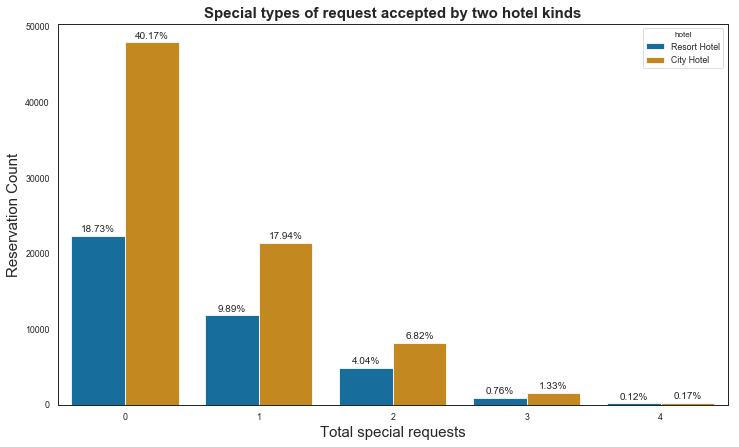

In [470]:
fig, ax = plt.subplots(figsize = (12,7))

sns.countplot(x= 'total_of_special_requests',order=pd.value_counts(df['total_of_special_requests']).iloc[:5].index,hue = 'hotel',data = df,palette= 'colorblind')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")
plt.title('Special types of request accepted by two hotel kinds', weight='bold',size = 15)
plt.xlabel('Total special requests',size = 15)
plt.ylabel('Reservation Count',size = 15)

# Effect on Average daily rate (monthly basis)

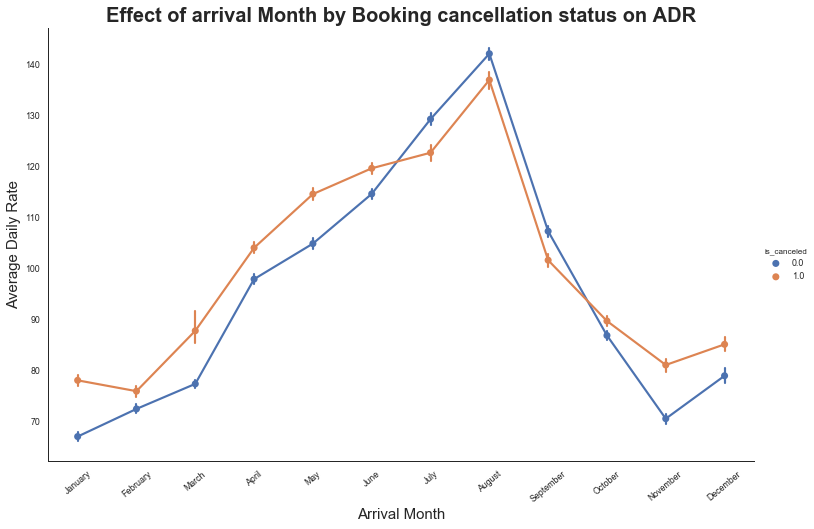

In [493]:

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

sns.catplot(x = "arrival_date_month", y = "adr", data=df, kind="point", order = months,hue = 'is_canceled',height=6.8, aspect=11.7/7.5)
plt.title("Effect of arrival Month by Booking cancellation status on ADR", weight = 'bold', size = 20)
plt.xlabel("Arrival Month", size = 15)
plt.xticks(rotation=40)
plt.ylabel("Average Daily Rate",size = 15)


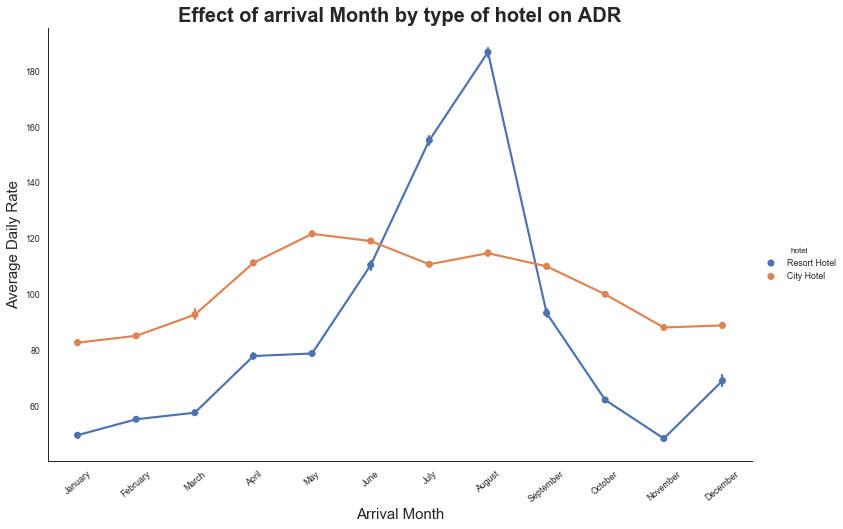

In [494]:

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

sns.catplot(x = "arrival_date_month", y = "adr", data=df, kind="point",order = months, hue = 'hotel',height=6.8, aspect=11.7/7.5)
plt.title("Effect of arrival Month by type of hotel on ADR", weight = 'bold', size = 20)
plt.xlabel("Arrival Month", size = 15)
plt.xticks(rotation=40)
plt.ylabel("Average Daily Rate",size = 15)


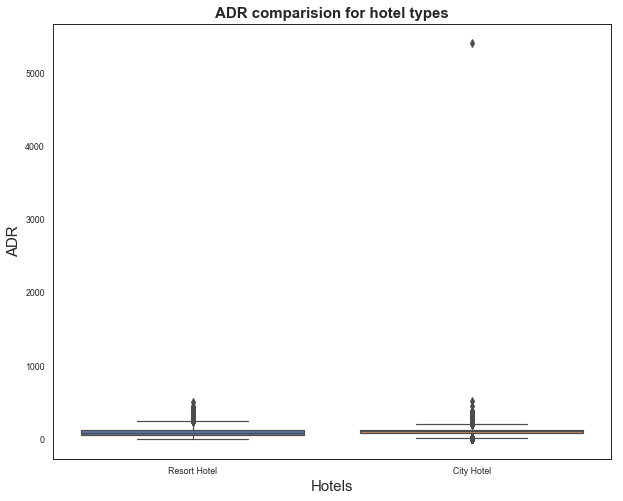

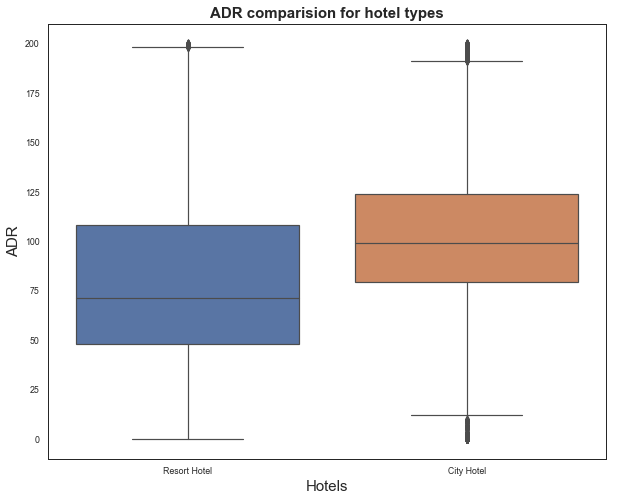

In [542]:
fig, ax = plt.subplots(figsize = (10,8))

df1 = df.loc[df['adr']<10000]
sns.boxplot(y = df1["adr"], x = df1['hotel'])
plt.title('ADR comparision for hotel types', weight='bold',size= 15)
plt.xlabel('Hotels',size = 15)
plt.ylabel('ADR',size = 15)



#Zooming in to see the comparision between the adr of two hotels
fig, ax = plt.subplots(figsize = (10,8))

df1 = df.loc[df['adr']<200]
sns.boxplot(y = df1["adr"], x = df1['hotel'])
plt.title('ADR comparision for hotel types', weight='bold',size= 15)
plt.xlabel('Hotels',size = 15)
plt.ylabel('ADR',size = 15)

# Effect of Meal type on Cancellations

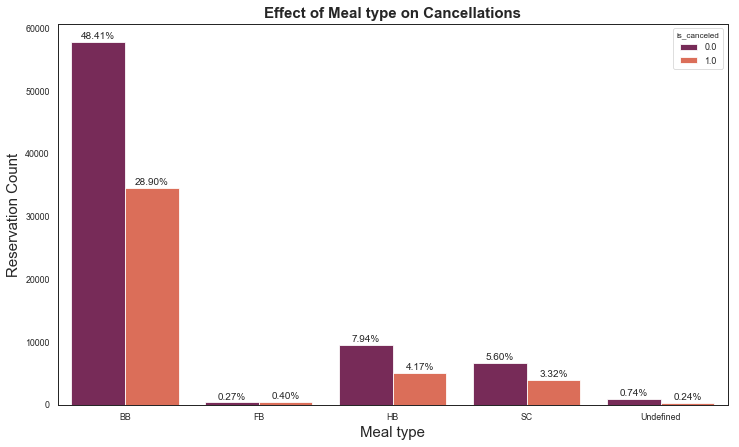

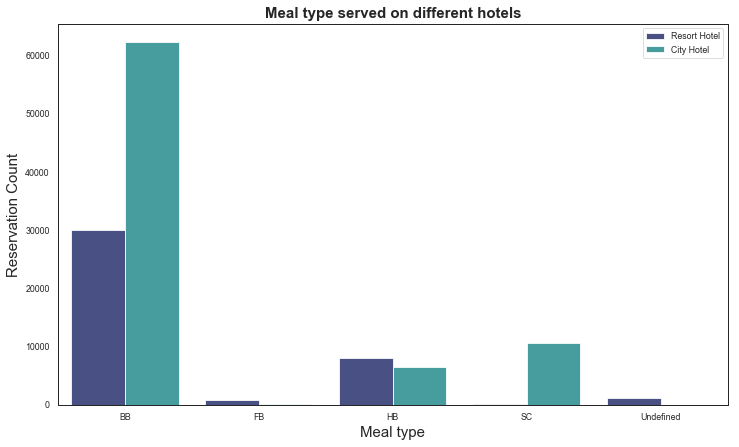

In [483]:
fig, ax = plt.subplots(figsize = (12,7))

sns.countplot(x= 'meal',hue = 'is_canceled',data = df,palette= 'rocket')
plt.title ('Effect of Meal type on Cancellations',weight = 'bold', size = 15)
plt.xlabel("Meal type",size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")
    
    
    
fig, ax = plt.subplots(figsize = (12,7))

sns.countplot(x= 'meal',hue = 'hotel',data = df,palette= 'mako')
plt.title ('Meal type served on different hotels',weight = 'bold', size = 15)
plt.xlabel("Meal type",size = 15)
plt.ylabel('Reservation Count',size = 15)
plt.legend(loc="upper right")